# Data Description
Rossmann Stores train.csv - historical data including Sales

store.csv - supplemental information about the store

Data fields Most of the fields are self-explanatory. The following are descriptions for those that aren't.

ID - an Id that represents a (Store, Date) duple within the test set

Store - a unique Id for each store

Sales - the turnover for any given day (this is what you are predicting)

Customers - the number of customers on a given day

Open - an indicator for whether the store was open: 0 = closed, 1 = open StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

StoreType - differentiates between 4 different store models: a, b, c, d

Assortment - describes an assortment level: a = basic, b = extra, c = extended

CompetitionDistance - distance in meters to the nearest competitor store

CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

Promo - indicates whether a store is running a promo on that day

Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Loading

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#Rosmann Data
sales_data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/train.csv")
# Store data
store_df =pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/store.csv")

<ipython-input-7-2f8bbc8ae7bf>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/train.csv")


In [9]:
sales_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [15]:
sales_data.shape

(1017209, 9)

In [11]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [12]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [13]:
sales_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [14]:
# change state holiday value a,b,c is equal to 1
sales_data['StateHoliday'].value_counts()

,count
StateHoliday,
0,855087
0,131072
a,20260
b,6690
c,4100


In [16]:
# change datatype object into date format
sales_data['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

## data quality checking

In [17]:
# check missing values
sales_data.isnull().sum()



,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


## Data Cleaning

In [18]:
store_df.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


In [19]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [20]:

store_df.nunique()

,0
Store,1115
StoreType,4
Assortment,3
CompetitionDistance,654
CompetitionOpenSinceMonth,12
CompetitionOpenSinceYear,23
Promo2,2
Promo2SinceWeek,24
Promo2SinceYear,7
PromoInterval,3


In [25]:
# STORE DATASET FILL INTO NULL VALUES I.E 0
store_df['CompetitionDistance'] = store_df['CompetitionDistance'].fillna(0)
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(0)
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(0)
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(0)
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(0)
store_df['PromoInterval'] = store_df['PromoInterval'].fillna(0)




In [26]:
store_df.isna().sum()


,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
Promo2,0
Promo2SinceWeek,0
Promo2SinceYear,0
PromoInterval,0


In [28]:
df = pd.merge(sales_data, store_df, on='Store', how='left')

In [29]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [30]:
#Change data types object to int
df.loc[df['StateHoliday'] == '0', 'StateHoliday'] = 0
df.loc[df['StateHoliday'] == 'a', 'StateHoliday'] = 1
df.loc[df['StateHoliday'] == 'b', 'StateHoliday'] = 2
df.loc[df['StateHoliday'] == 'c', 'StateHoliday'] = 3
#store the value with same column name i.e StateHoliday with function astype
df['StateHoliday'] = df['StateHoliday'].astype(int, copy=False)

In [32]:
# change Data Types object into int
df.loc[df['Assortment'] == 'a', 'Assortment'] = 0
df.loc[df['Assortment'] == 'b', 'Assortment'] = 1
df.loc[df['Assortment'] == 'c', 'Assortment'] = 2
#store the value with same column name i.e Assortment with function astype
df['Assortment'] = df['Assortment'].astype(int, copy=False)

In [33]:
# change Data Types object into int
df.loc[df['StoreType'] == 'a', 'StoreType'] = 0
df.loc[df['StoreType'] == 'b', 'StoreType'] = 1
df.loc[df['StoreType'] == 'c', 'StoreType'] = 2
df.loc[df['StoreType'] == 'd', 'StoreType'] = 3
#store the value with same column name i.e Assortment with function astype
df['StoreType'] = df['StoreType'].astype(int, copy=False)

In [34]:
# change Data Types object into int
df.loc[df['StoreType'] == 'a', 'StoreType'] = 0
df.loc[df['StoreType'] == 'b', 'StoreType'] = 1
df.loc[df['StoreType'] == 'c', 'StoreType'] = 2
df.loc[df['StoreType'] == 'd', 'StoreType'] = 3
#store the value with same column name i.e Assortment with function astype
df['StoreType'] = df['StoreType'].astype(int, copy=False)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int64  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  int64  
 10  Assortment                 1017209 non-null  int64  
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [37]:
df['Sales'].value_counts()

,count
Sales,
0,172871
5674,215
5558,197
5483,196
6214,195
...,...
23806,1
24183,1
20651,1


In [38]:
# code for changing format of date from object to datetime
df['Date'] = pd.to_datetime(df['Date'], format= '%Y-%m-%d')

In [41]:
# code for change object into date format
df['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(df['Date']).month

In [42]:
# code for change float into integer
df['CompetitionOpenSinceYear']= df['CompetitionOpenSinceYear'].astype(int)
df['Promo2SinceYear']= df['Promo2SinceYear'].astype(int)

In [43]:
# code for change float into integer
df['CompetitionDistance']= df['CompetitionDistance'].astype(int)
df['Promo2SinceWeek']= df['Promo2SinceWeek'].astype(int)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

In [45]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0


In [49]:
df.describe().apply(lambda x: round(x, 2))

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.00,1017209.0,1017209,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.0,1017209.00,1017209.00
mean,558.43,4.0,2014-04-11 01:30:42.846061824,5773.82,633.15,0.83,0.38,0.05,0.18,1.21,0.94,5415.98,5.85,1370.17,0.5,11.65,1007.01
min,1.00,1.0,2013-01-01 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0,0.00,0.00
25%,280.00,2.0,2013-08-17 00:00:00,3727.00,405.00,1.00,0.00,0.00,0.00,0.00,0.00,700.00,3.00,0.00,0.0,0.00,0.00
50%,558.00,4.0,2014-04-02 00:00:00,5744.00,609.00,1.00,0.00,0.00,0.00,0.00,0.00,2320.00,6.00,2006.00,1.0,1.00,2009.00
75%,838.00,6.0,2014-12-12 00:00:00,7856.00,837.00,1.00,1.00,0.00,0.00,3.00,2.00,6880.00,8.00,2011.00,1.0,22.00,2012.00
max,1115.00,7.0,2015-07-31 00:00:00,41551.00,7388.00,1.00,1.00,3.00,1.00,3.00,2.00,75860.00,12.00,2015.00,1.0,50.00,2015.00
std,321.91,2.0,NaN,3849.93,464.41,0.38,0.49,0.28,0.38,1.37,0.99,7710.25,3.33,935.36,0.5,15.32,1005.88


Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

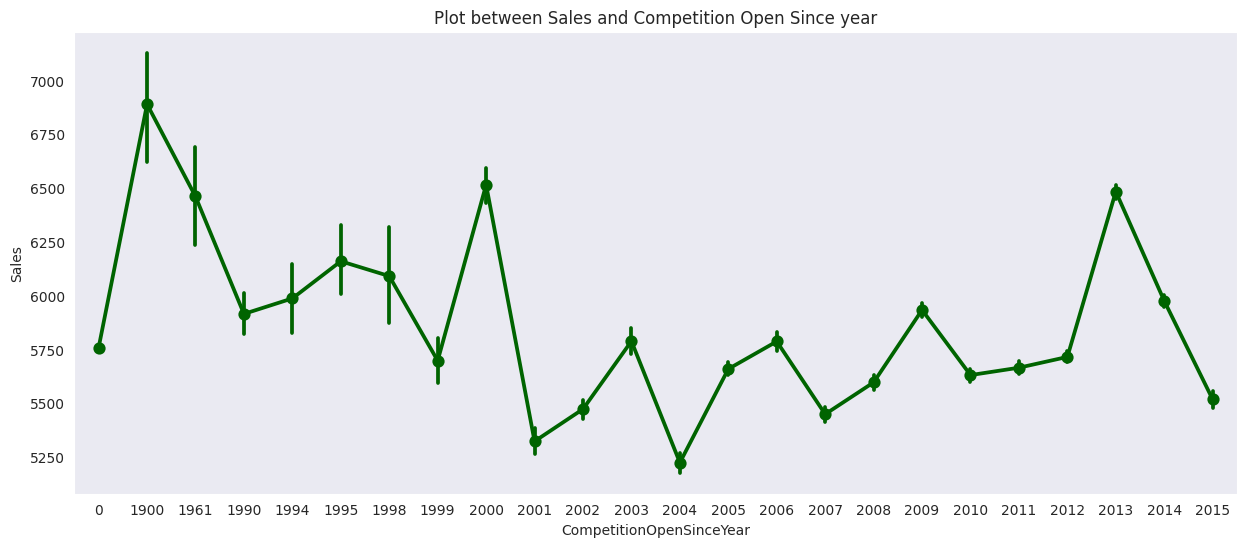

In [52]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=df,color='darkgreen')
sns.set_style("dark")
plt.title('Plot between Sales and Competition Open Since year')

From this chart we get insights that Sales is Highest During the Year 1900 because for that time there are limited number of Stores ,hence the competition is very low. But as year pass,no of stores get increased that means Competition also increased accordignly ,hence Sales got Decline year by year.

### Boxplot

Text(0.5, 1.0, 'Boxplot For Sales Values')

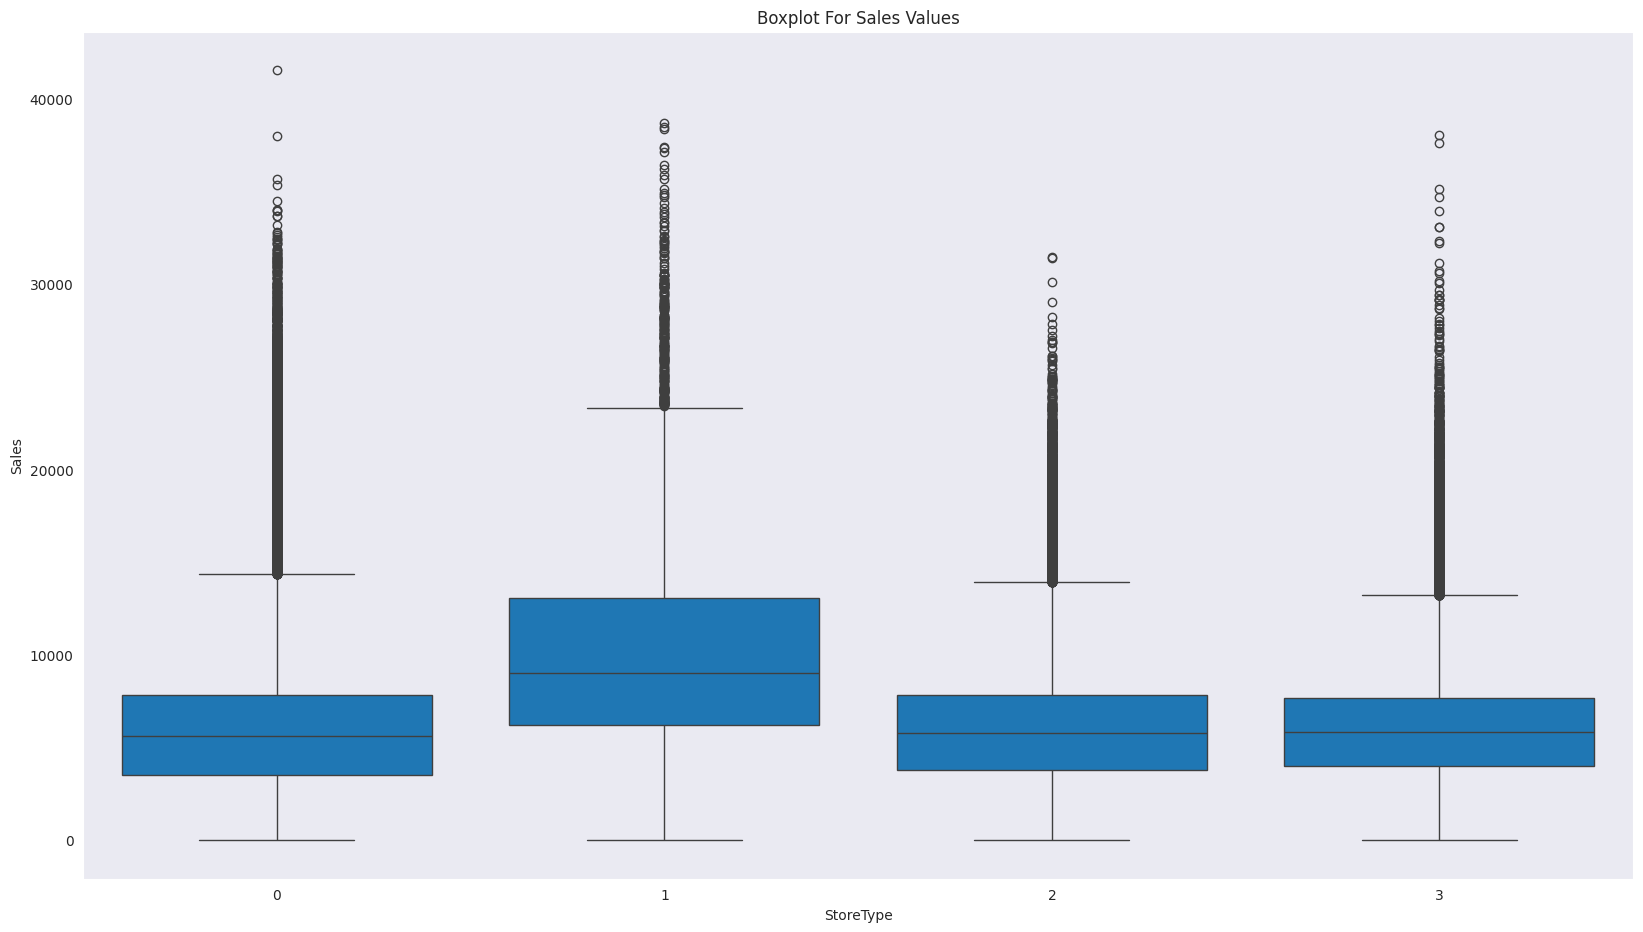

In [54]:
plt.figure(figsize=(20, 11))
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=df, saturation=1.5,width=0.8)
plt.title('Boxplot For Sales Values')

Text(0.5, 1.0, 'Boxplot For Sales Values on the basis of Assortment')

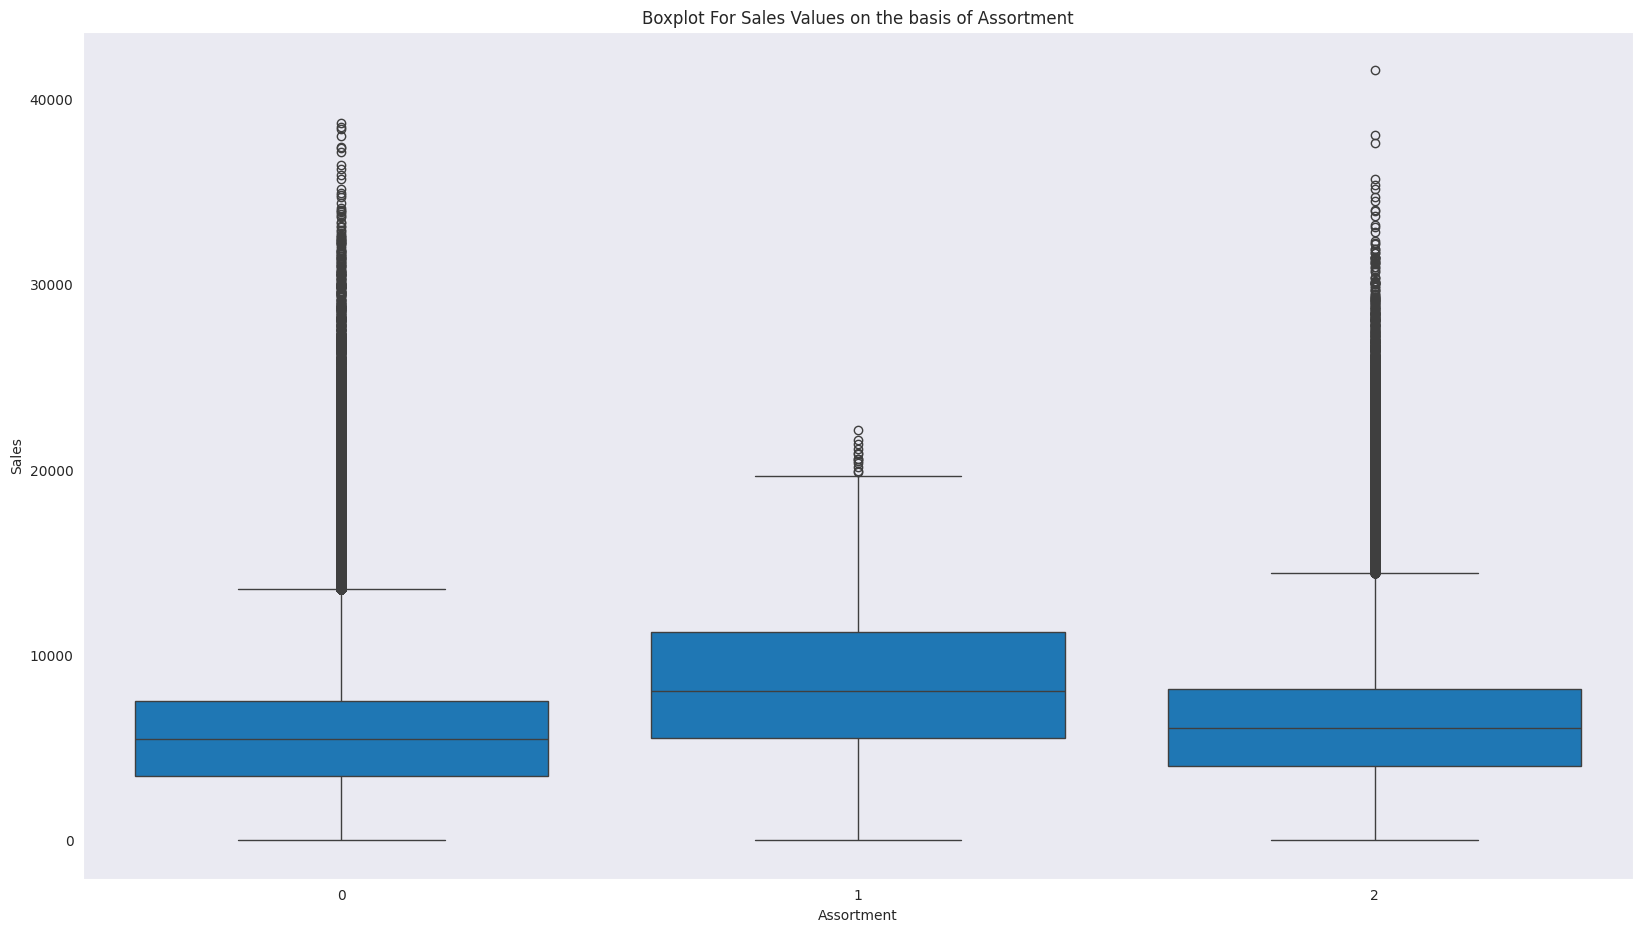

In [56]:
plt.figure(figsize=(20, 11))
plot_storetype_sales = sns.boxplot(x="Assortment", y="Sales", data=df, saturation=1.5,width=0.8)
plt.title('Boxplot For Sales Values on the basis of Assortment')

Text(0.5, 1.0, 'Store Daily Open Countplot')

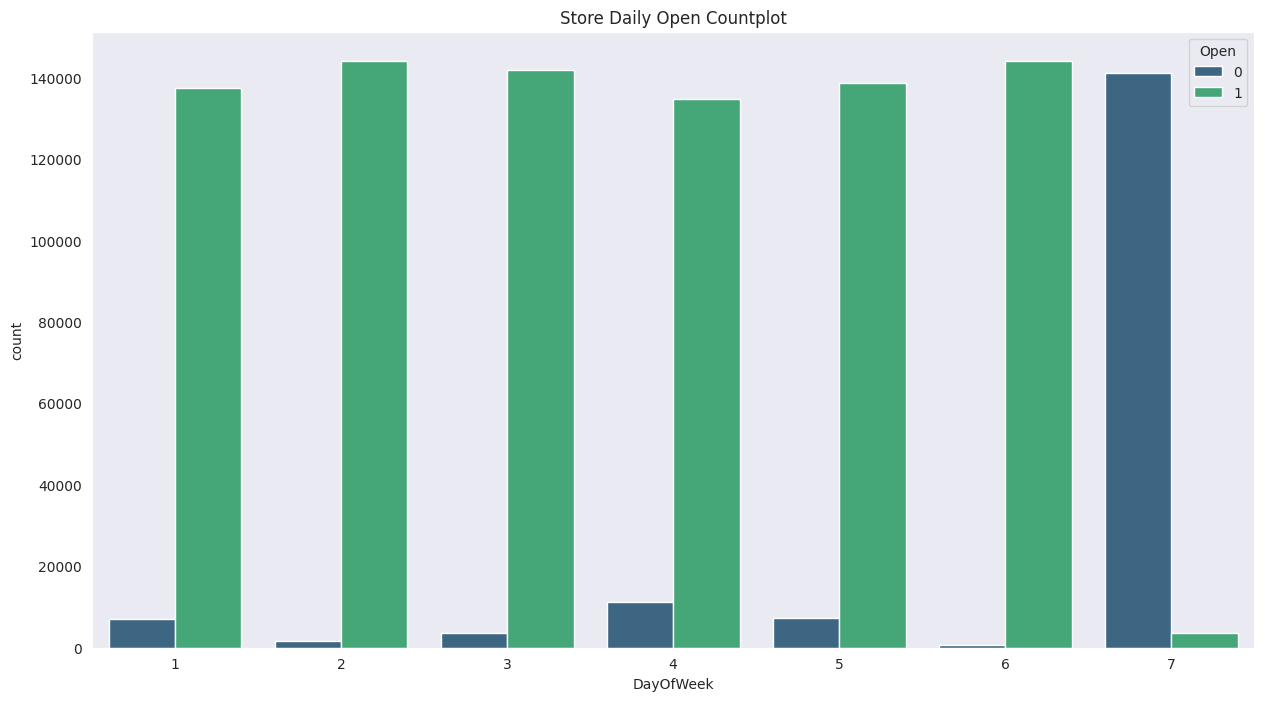

In [58]:
## daily opening of the stores
plt.figure(figsize=(15, 8))
sns.countplot(x= 'DayOfWeek', hue='Open', data= df, palette='viridis')
plt.title('Store Daily Open Countplot')

Text(0.5, 1.0, 'Store Daily Promo Countplot')

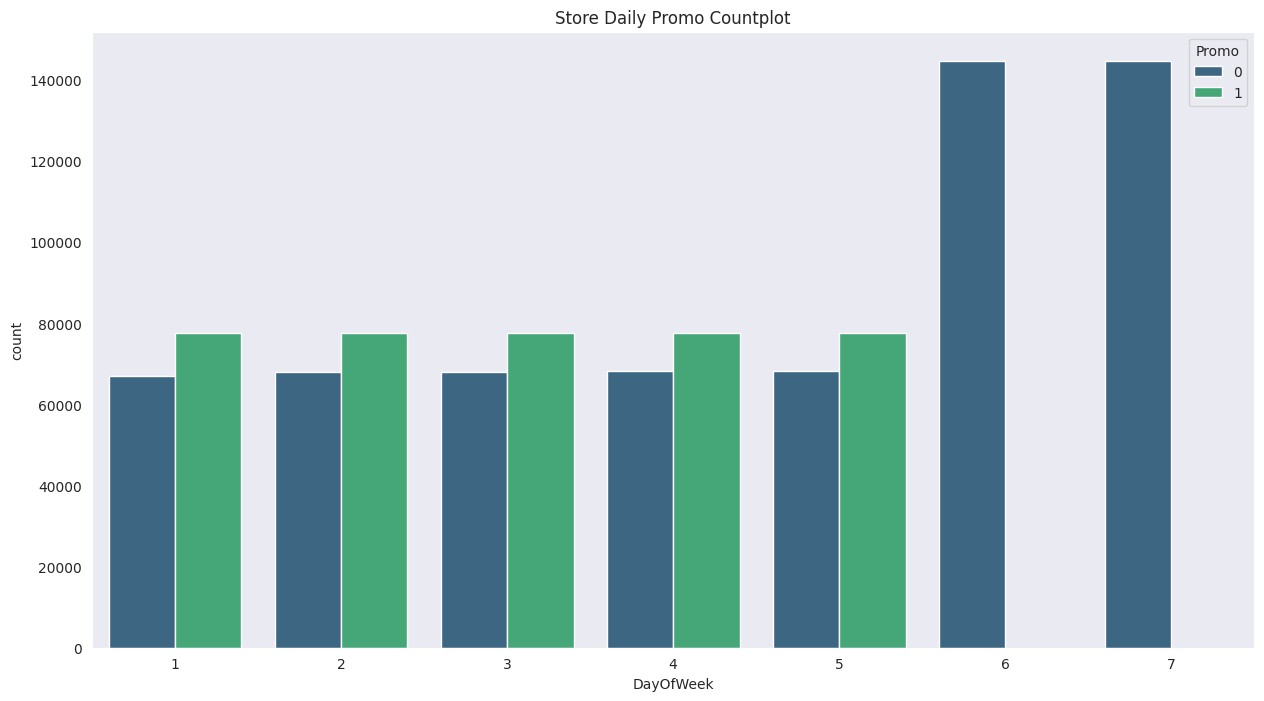

In [59]:
## daily promo
plt.figure(figsize=(15, 8))
sns.countplot(x= 'DayOfWeek', hue='Promo', data= df, palette='viridis')
plt.title('Store Daily Promo Countplot')

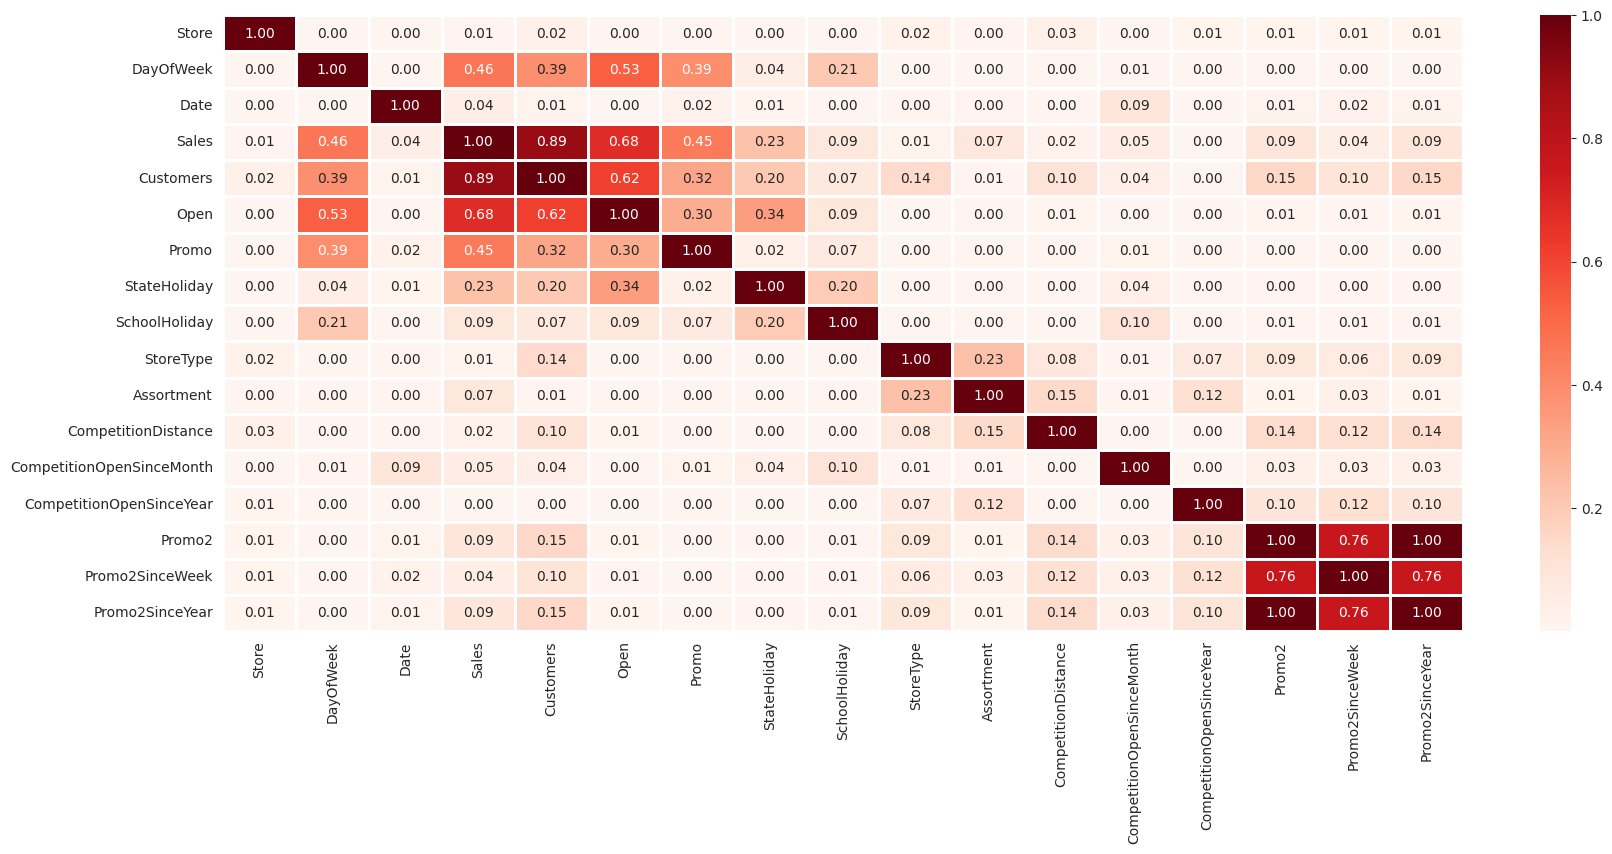

In [63]:
# Create a subset of the DataFrame excluding 'PromoInterval'
df_subset = df.drop('PromoInterval', axis=1)  # axis=1 specifies column

# Calculate the correlation matrix on the subset
correlation = df_subset.corr()

# Create the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(abs(correlation), annot=True, cmap='Reds', linewidths=2, fmt=".2f")
plt.show()


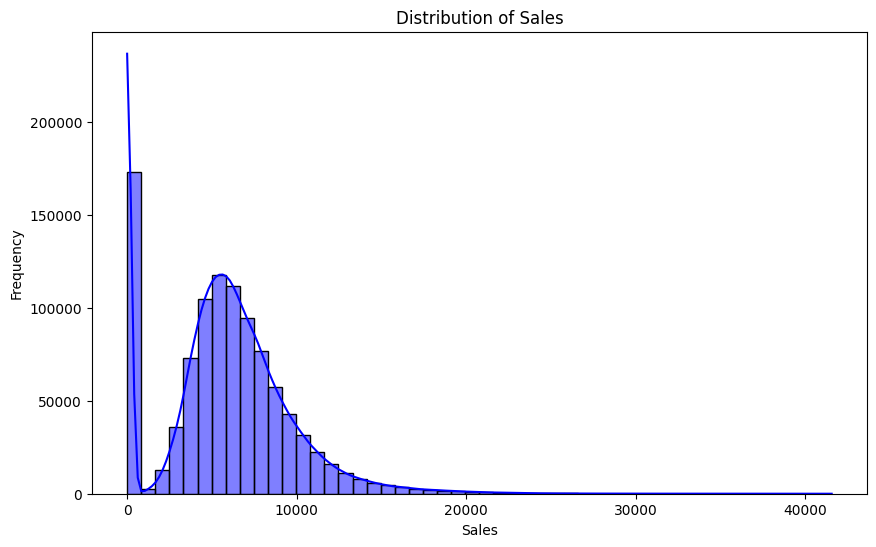

172871

In [ ]:
# Convert Date to datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Clean StateHoliday column by standardizing its data types
train_df['StateHoliday'] = train_df['StateHoliday'].astype(str)

# Check for zero sales (stores that were likely closed)
zero_sales = train_df[train_df['Sales'] == 0].shape[0]

# Initial summary visualization: sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Sales'], bins=50, kde=True, color='blue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Store zero sales information for the EDA report
zero_sales


## Correlations between key features

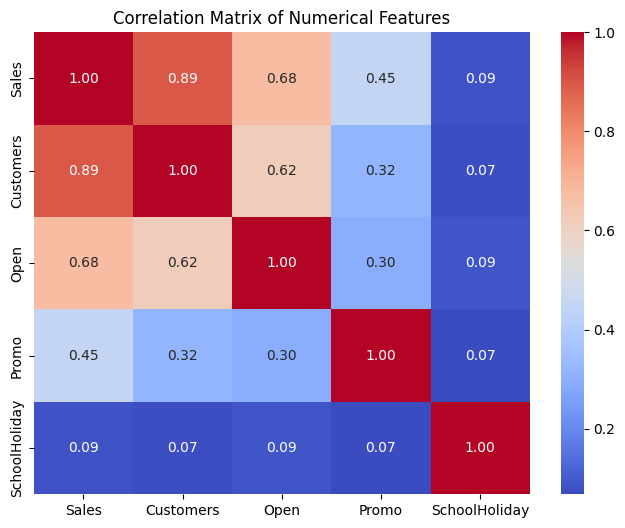

C:\Users\smrc\AppData\Local\Temp\ipykernel_5788\2626253351.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dayofweek_sales.index, y=dayofweek_sales.values, palette='viridis')


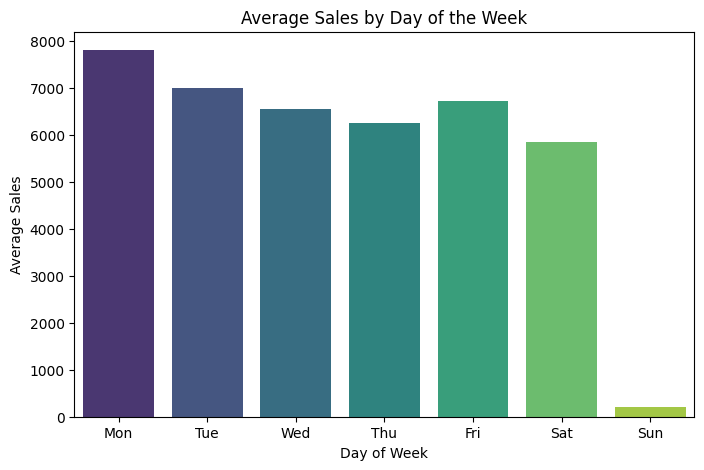

In [ ]:
# Correlation analysis between numerical features
correlation_matrix = train_df[['Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday']].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Grouping sales by DayOfWeek for trend analysis
dayofweek_sales = train_df.groupby('DayOfWeek')['Sales'].mean()

# Visualizing sales by day of the week
plt.figure(figsize=(8, 5))
sns.barplot(x=dayofweek_sales.index, y=dayofweek_sales.values, palette='viridis')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


#### Let’s analyze the time-series trends and examine how holidays and promotions affect sales. I'll start by aggregating sales data over time and look at monthly and weekly trends, as well as the impact of holidays and promotions.

In [ ]:
# Extracting year and month from the Date column for time-series analysis
train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month
train_df['Week'] = train_df['Date'].dt.isocalendar().week

In [ ]:
# Aggregating sales data by month
monthly_sales = train_df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str)

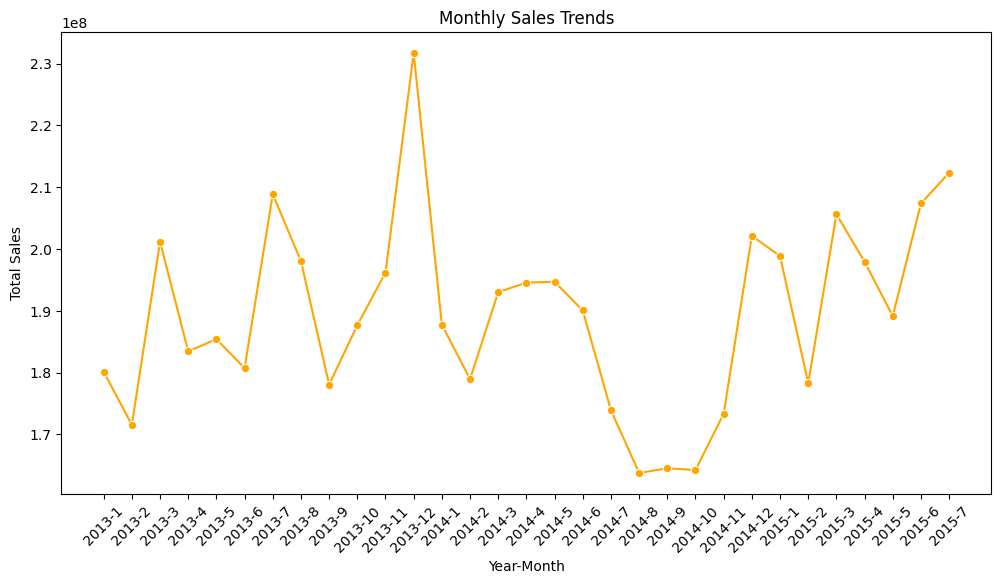

In [ ]:
# Visualizing monthly sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='Sales', marker='o', color='orange')
plt.title('Monthly Sales Trends')
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.show()

## The Impact of Promotions on Sales

C:\Users\smrc\AppData\Local\Temp\ipykernel_5788\1444390957.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promo_sales.index, y=promo_sales.values, palette='magma')


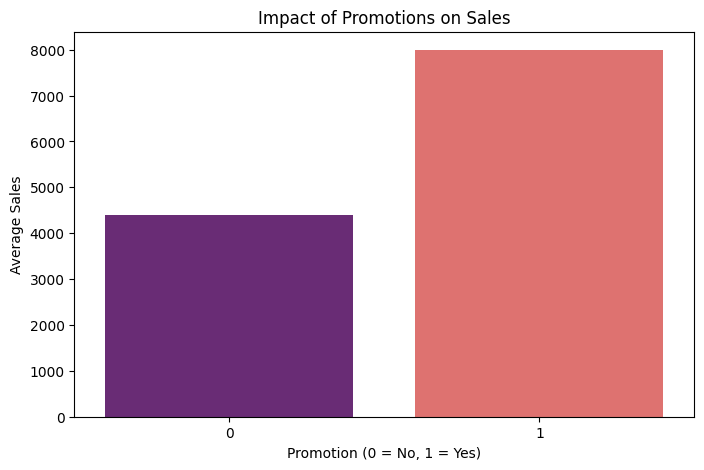

In [ ]:
# Analyzing impact of promotions on sales
promo_sales = train_df.groupby('Promo')['Sales'].mean()

# Visualizing sales with and without promotions
plt.figure(figsize=(8, 5))
sns.barplot(x=promo_sales.index, y=promo_sales.values, palette='magma')
plt.title('Impact of Promotions on Sales')
plt.xlabel('Promotion (0 = No, 1 = Yes)')
plt.ylabel('Average Sales')
plt.show()

## The impact of state holidays

C:\Users\smrc\AppData\Local\Temp\ipykernel_5788\1168586209.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=holiday_sales.index, y=holiday_sales.values, palette='coolwarm')


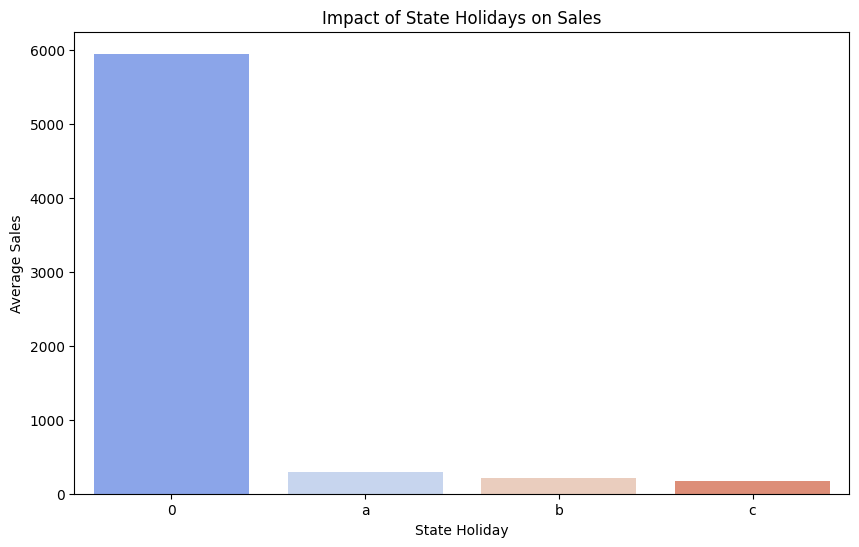

In [ ]:
# Analyzing the impact of State Holidays
holiday_sales = train_df.groupby('StateHoliday')['Sales'].mean()

# Visualizing sales during different state holidays
plt.figure(figsize=(10, 6))
sns.barplot(x=holiday_sales.index, y=holiday_sales.values, palette='coolwarm')
plt.title('Impact of State Holidays on Sales')
plt.xlabel('State Holiday')
plt.ylabel('Average Sales')
plt.show()

### Sales Behavior Before, During, and After Holidays

In [ ]:
holiday_sales = train_df[train_df['StateHoliday'] != '0']
before_holidays = train_df[train_df['Date'].isin(holiday_sales['Date'] - pd.Timedelta(days=1))]
after_holidays = train_df[train_df['Date'].isin(holiday_sales['Date'] + pd.Timedelta(days=1))]

print("Average Sales on Holidays:", holiday_sales['Sales'].mean())
print("Average Sales Before Holidays:", before_holidays['Sales'].mean())
print("Average Sales After Holidays:", after_holidays['Sales'].mean())


Average Sales on Holidays: 258.1595813204509
Average Sales Before Holidays: 5632.308307613169
Average Sales After Holidays: 6874.59061605476


C:\Users\smrc\AppData\Local\Temp\ipykernel_5788\3119299178.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Period', y='Average Sales', data=sales_df, palette="viridis") # Use a visually appealing color palette


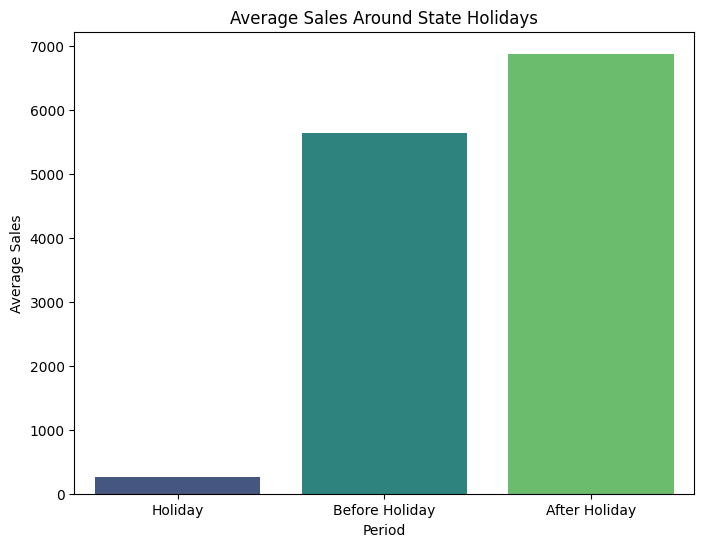

In [ ]:
# Create a DataFrame for plotting
data = {
    'Period': ['Holiday', 'Before Holiday', 'After Holiday'],
    'Average Sales': [holiday_sales['Sales'].mean(), before_holidays['Sales'].mean(), after_holidays['Sales'].mean()]
}
sales_df = pd.DataFrame(data)

# Create the bar chart using Seaborn
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.barplot(x='Period', y='Average Sales', data=sales_df, palette="viridis") # Use a visually appealing color palette
plt.title('Average Sales Around State Holidays')
plt.ylabel('Average Sales')
plt.xlabel('Period')
plt.show()

### Seasonal Purchase Behaviors (Christmas, Easter, etc.)

In [ ]:
# Correctly specify Easter dates - REPLACE with actual dates from our dataset
train_df['Month'] = train_df['Date'].dt.month
christmas_sales = train_df[train_df['Month'] == 12]['Sales'].mean()
easter_sales = train_df[train_df['Date'].isin(['YYYY-MM-DD', 'YYYY-MM-DD'])]['Sales'].mean()  # Add Easter dates
print("Average Christmas Sales:", christmas_sales)
print("Average Easter Sales:", easter_sales)


Average Christmas Sales: 6826.611376868607
Average Easter Sales: nan


C:\Users\smrc\AppData\Local\Temp\ipykernel_5788\424808150.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Holiday', y='Average Sales', data=holiday_sales_df, palette="pastel")


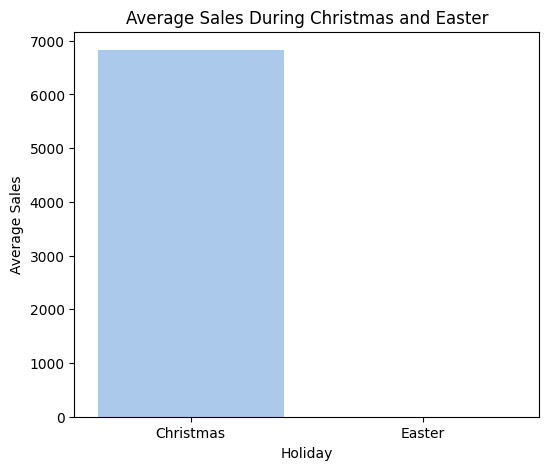

In [ ]:
# Create a DataFrame for plotting
data = {
    'Holiday': ['Christmas', 'Easter'],
    'Average Sales': [christmas_sales, easter_sales]
}
holiday_sales_df = pd.DataFrame(data)

# Create the bar chart
plt.figure(figsize=(6, 5))
sns.barplot(x='Holiday', y='Average Sales', data=holiday_sales_df, palette="pastel")
plt.title('Average Sales During Christmas and Easter')
plt.ylabel('Average Sales')
plt.show()

### Deployment of Promotions

In [ ]:
promo_impact = train_df.groupby(['Store', 'Promo'])['Sales'].mean().unstack()
promo_effective_stores = promo_impact[promo_impact[1] > promo_impact[0]]
print(promo_effective_stores)


Promo             0             1
Store                            
1       3198.994845   5152.886111
2       2855.058419   6172.816667
3       3967.596220   8608.666667
4       6568.939863  10370.511111
5       2582.271478   5944.266667
...             ...           ...
1111    3073.487973   6395.294444
1112    5975.537801  12490.363889
1113    4400.362543   7320.086111
1114   14477.742268  21601.497222
1115    4082.221649   7073.266667

[1114 rows x 2 columns]


C:\Users\smrc\AppData\Local\Temp\ipykernel_5788\345988176.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_promo_sales_stores.index, y=top_20_promo_sales_stores.values, palette="viridis", order=top_20_promo_sales_stores.index) # Use 'order' to arrange from highest to lowest


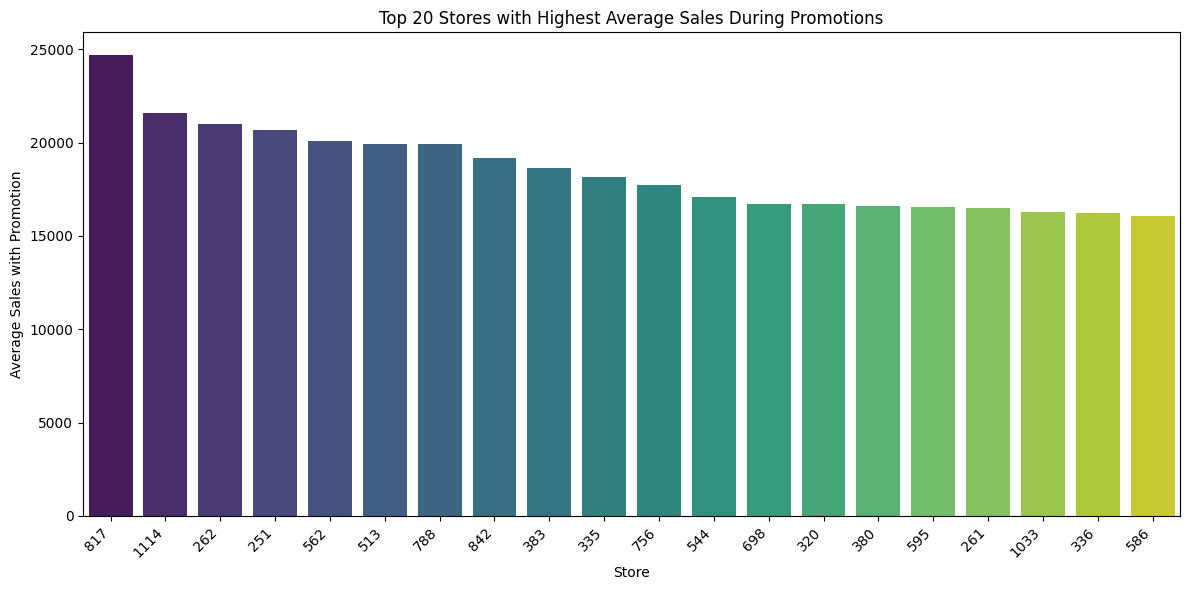

In [ ]:
# Calculate average sales with promotions for each store
promo_sales = train_df[train_df['Promo'] == 1].groupby('Store')['Sales'].mean()

# Get the top 20 stores with the highest average sales during promotions
top_20_promo_sales_stores = promo_sales.nlargest(20)

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_promo_sales_stores.index, y=top_20_promo_sales_stores.values, palette="viridis", order=top_20_promo_sales_stores.index) # Use 'order' to arrange from highest to lowest
plt.title('Top 20 Stores with Highest Average Sales During Promotions')
plt.ylabel('Average Sales with Promotion')
plt.xlabel('Store')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

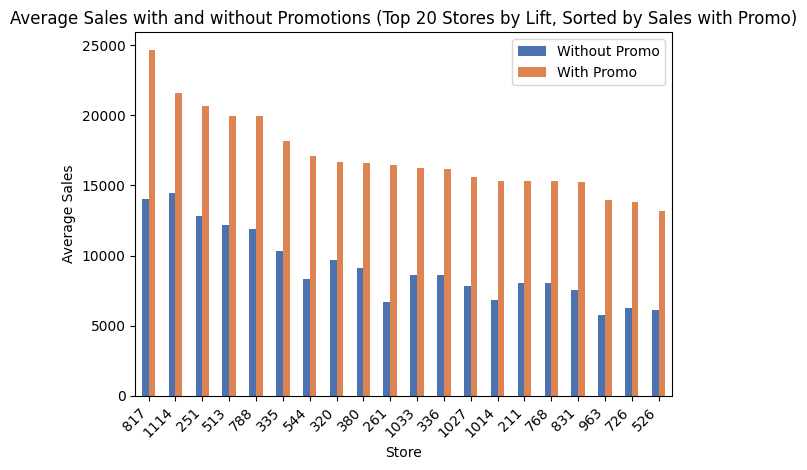

In [ ]:

promo_impact = train_df.groupby(['Store', 'Promo'])['Sales'].mean().unstack()
promo_lift = promo_impact[1] - promo_impact[0]  # Calculate the lift from promotions
top_20_promo_stores = promo_lift.nlargest(20).index  # Get the top 20 stores by lift

# Filter for top 20 stores by lift AND sort by average sales WITH promotion
promo_impact_top_20 = promo_impact[promo_impact.index.isin(top_20_promo_stores)].sort_values(by=1, ascending=False) # Sort by column 1 (sales WITH promo)

# Create the bar chart
plt.figure(figsize=(12, 6))
promo_impact_top_20.plot(kind='bar', color=['#4c72b0', '#dd8452'])
plt.title('Average Sales with and without Promotions (Top 20 Stores by Lift, Sorted by Sales with Promo)')
plt.ylabel('Average Sales')
plt.xlabel('Store')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(['Without Promo', 'With Promo'])
plt.show()

## Analysis of Target Variable [Sales]

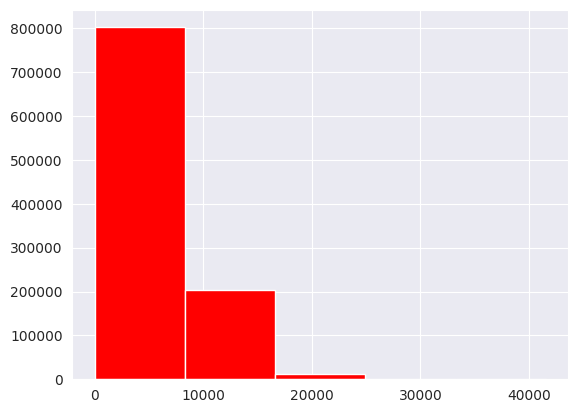

In [64]:
pd.Series(df['Sales'],).hist(bins=5, color="red")
plt.show()

In [65]:
df[(df.Open == 0) & (df.Sales == 0)].count()[0]

<ipython-input-65-aa1ccbbf2437>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[(df.Open == 0) & (df.Sales == 0)].count()[0]


172817

So we will drop thoose store which sales is 0 assuming that the stores were closed temoprarily and this will help to train the model more accurately.

In [67]:
new_df = df.drop(df[(df.Open == 0) & (df.Sales == 0)].index)

In [69]:
new_df.shape

(844392, 18)

In new_df dataset,column name 'PromoInterval' change into dummies it means that each new column will have a binary value (0 or 1).

In [70]:
new_df = pd.get_dummies(new_df, columns=['PromoInterval'])

In [71]:
new_df.to_csv('cleaned_df.csv', index=False)